In [1]:
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
import seaborn as sns

C:\Users\Komputer\AppData\Roaming\Python\Python38\site-packages\pandas\core\computation\expressions.py:20: UserWarning: Pandas requires version '2.7.3' or newer of 'numexpr' (version '2.7.1' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED


In [2]:
income = pd.read_csv("C:/Users/Komputer/Downloads/zarobki30tys.csv")


In [114]:
#Goal: Examine individual variables such as working hours, gender, race, relationships, education ages, employment  in relation to earnings above 50k and below 50k .
#Cel: Zbadać poszczególne zmienne takie jak godziny pracy, płeć, rasa, związek, lata edukacji, zatrudnienie w stosunku do zarobków powyżej 50k i poniżej 50k.

In [119]:
# Analyse the data, checking data, info about data, null values
# Analiza danych, sprawdzanie danych, informacji o danych, wartości nullowych

In [3]:
income.head()

,age,employment,data_weight,education,education_ages,marital_status,profession,relation,race,gender,capital_profit,capital_loss,work_hours,country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [4]:
income.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30162 entries, 0 to 30161
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             30162 non-null  int64 
 1   employment      30162 non-null  object
 2   data_weight     30162 non-null  int64 
 3   education       30162 non-null  object
 4   education_ages  30162 non-null  int64 
 5   marital_status  30162 non-null  object
 6   profession      30162 non-null  object
 7   relation        30162 non-null  object
 8   race            30162 non-null  object
 9   gender          30162 non-null  object
 10  capital_profit  30162 non-null  int64 
 11  capital_loss    30162 non-null  int64 
 12  work_hours      30162 non-null  int64 
 13  country         30162 non-null  object
 14  income          30162 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.5+ MB


In [5]:
income.isnull().sum()

age               0
employment        0
data_weight       0
education         0
education_ages    0
marital_status    0
profession        0
relation          0
race              0
gender            0
capital_profit    0
capital_loss      0
work_hours        0
country           0
income            0
dtype: int64

In [120]:
#Analysis of income
#Analiza zarobków

In [6]:
income["income"].describe()

count     30162
unique        2
top       <=50K
freq      22654
Name: income, dtype: object

In [7]:
income_less_than_50k = income[income['income'] == '<=50K']
inc_less_count = income_less_than_50k.value_counts()
income_less_than_50k.describe()

,age,data_weight,education_ages,capital_profit,capital_loss,work_hours
count,22654.000000,2.265400e+04,22654.000000,22654.000000,22654.000000,22654.000000
mean,36.608060,1.903386e+05,9.629116,148.893838,53.448000,39.348592
std,13.464631,1.065713e+05,2.413596,936.392280,310.270263,11.950774
min,17.000000,1.376900e+04,1.000000,0.000000,0.000000,1.000000
25%,26.000000,1.173120e+05,9.000000,0.000000,0.000000,38.000000
50%,34.000000,1.795085e+05,9.000000,0.000000,0.000000,40.000000
75%,45.000000,2.394390e+05,10.000000,0.000000,0.000000,40.000000
max,90.000000,1.484705e+06,16.000000,41310.000000,4356.000000,99.000000


In [8]:
income_more_than_50k = income[income['income'] == '>50K']
index_more = np.arange(len(income_more_than_50k))
income_more_than_50k.describe()

,age,data_weight,education_ages,capital_profit,capital_loss,work_hours
count,7508.000000,7.508000e+03,7508.000000,7508.000000,7508.000000,7508.000000
mean,43.959110,1.881500e+05,11.606420,3937.679808,193.750666,45.706580
std,10.269633,1.028217e+05,2.368423,14386.060019,592.825590,10.736987
min,19.000000,1.487800e+04,2.000000,0.000000,0.000000,1.000000
25%,36.000000,1.191005e+05,10.000000,0.000000,0.000000,40.000000
50%,43.000000,1.761850e+05,12.000000,0.000000,0.000000,40.000000
75%,51.000000,2.310660e+05,13.000000,0.000000,0.000000,50.000000
max,90.000000,1.226583e+06,16.000000,99999.000000,3683.000000,99.000000


In [9]:
income["data_weight"].sum()/51 #51 states

112246306.25490196

In [132]:
#First correlation between data. Do education ages Do years of education affect earnings between >50K and <50k?
#Pierwsza korelacja pomiędzy danymi. Czy lata edukacji wpływają na wysokość zarobków pomiędzy >50K i <50K?

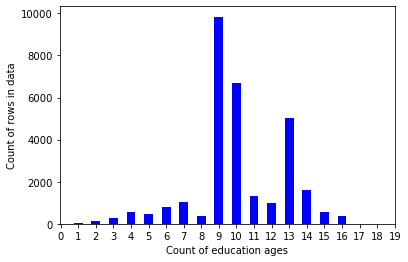

In [10]:
hist_ed_ag = income["education_ages"].value_counts().sort_index()
plt.bar(hist_ed_ag.index,hist_ed_ag,width=0.5, color="blue")
plt.xticks(np.arange(0,20, step=1))
plt.ylabel("Count of rows in data", fontsize=10)
plt.xlabel("Count of education ages", fontsize=10)
plt.show()

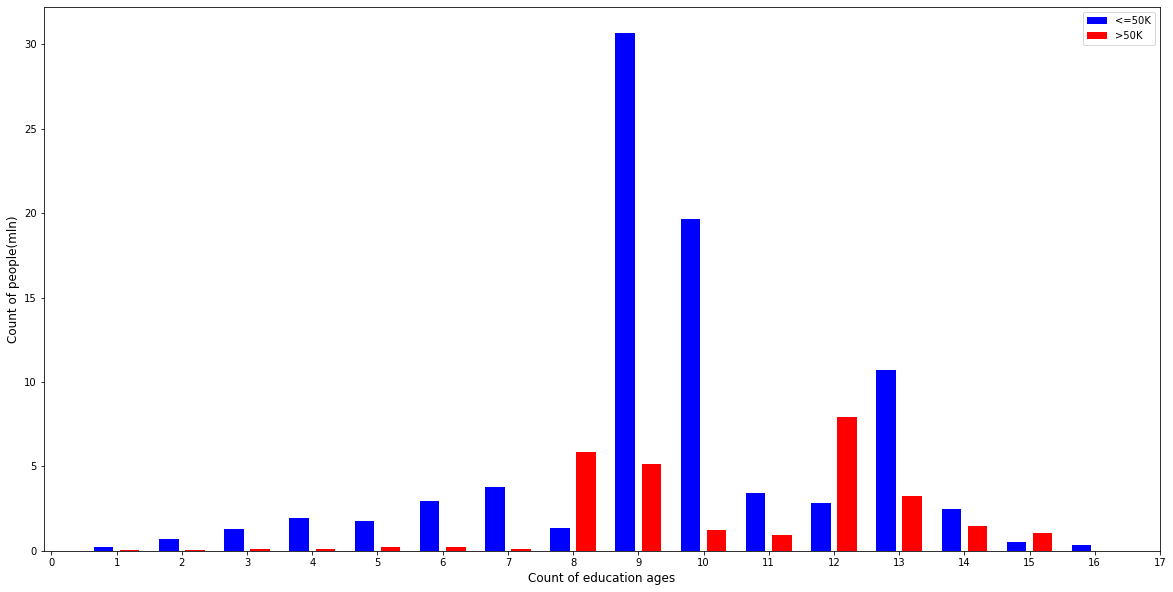

In [11]:
hist_ed_ag = income.groupby(["income", "education_ages"]).sum()
hist_ed_ag = hist_ed_ag["data_weight"]
plt.figure(figsize=(20,10))
plt.bar(np.arange(1, hist_ed_ag["<=50K"].index.size+1, step=1)-0.2, hist_ed_ag.loc[("<=50K")]/51000000, width=0.3, color="blue", label="<=50K")
plt.bar(np.arange(1, hist_ed_ag[">50K"].index.size+1, step=1)+0.2, hist_ed_ag.loc[(">50K")]/51000000, width=0.3, color="red", label=">50K")
plt.legend()
plt.xticks(np.arange(0, 18, step=1))
plt.ylabel("Count of people(mln)", fontsize=12)
plt.xlabel("Count of education ages", fontsize=12)
plt.show()

In [12]:
income['income'].apply(lambda x: '<50k' if x < '<50K' else '>=50k')
grouped_data = income.groupby(['income', 'education_ages']).size()
print(grouped_data)

income  education_ages
<=50K   1                   45
        2                  145
        3                  276
        4                  522
        5                  430
        6                  761
        7                  989
        8                  348
        9                 8223
        10                5342
        11                 963
        12                 752
        13                2918
        14                 709
        15                 136
        16                  95
>50K    2                    6
        3                   12
        4                   35
        5                   25
        6                   59
        7                   59
        8                   29
        9                 1617
        10                1336
        11                 344
        12                 256
        13                2126
        14                 918
        15                 406
        16                 280
dtype: int64


In [31]:
# Conclusion:
# Earnings above 50K are definitely influenced by the number of years of education. Below 9 years of education, the number of people earning over 50K drops dramatically.
# With an education that lasts 15 years, you are more likely to earn more than 50K, rather than less.
# The variable has a big impact on earnings.

# Wnioski:
# Na zarobki powyżej 50K zdecydowanie wpływa ilość lat edukacji. Poniżej 9 lat edukacji liczba osób zarabiających powyżej 50K drastycznie spada.
# Przy edukacji, która trwającej 15 lat bardzo prawdopodobne jest zarabianie powyżej 50K, aniżeli poniżej tej kwoty.
# Zmienna ma duży wpływ na zarobki.

In [137]:
#Second correlation: Analysis of work hours and income. How much working houres influence on incomes.
#Analiza kolumny godziny pracowniczne, a ich przychód. Jak godziny pracy wpływają na zarobki.

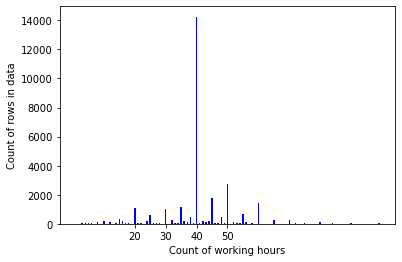

In [13]:
#Histogram count rows of work_hour in week / rozkład godzin pracujących
hist = income["work_hours"].value_counts().sort_index()
plt.bar(hist.index,hist,width=0.5, color="blue")
plt.xticks(np.arange(20, 60, step=10))
plt.ylabel("Count of rows in data", fontsize=10)
plt.xlabel("Count of working hours", fontsize=10)
plt.show()

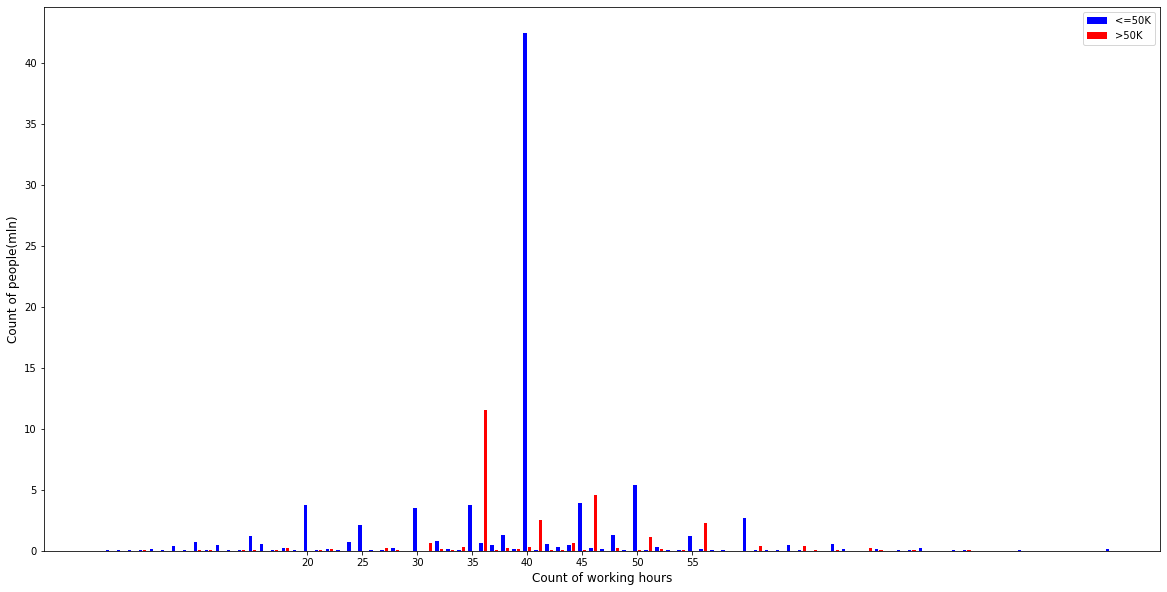

In [14]:
hist1 = income.groupby(["income", "work_hours"]).sum()
hist1 = hist1["data_weight"]
plt.figure(figsize=(20,10))
plt.bar(np.arange(1, hist1["<=50K"].index.size+1, step=1)-0.2, hist1.loc[("<=50K")]/51000000, width=0.3, color="blue", label="<=50K")
plt.bar(np.arange(1, hist1[">50K"].index.size+1, step=1)+0.2, hist1.loc[(">50K")]/51000000, width=0.3, color="red", label=">50K")
plt.legend()
plt.xticks(np.arange(20, 60, step=5))
plt.ylabel("Count of people(mln)", fontsize=12)
plt.xlabel("Count of working hours", fontsize=12)
plt.show()

In [32]:
# Conclusion:
# Most people work 40 hours a week. Most of these people earn less than 50K per year.
# The largest number of people earning over 50K work more than 35 hours a week and less than 40 hours a week.
# Many people also work over 45 hours a week and earn over 50K. The more working hours, the greater the surplus of people earning over 50K.

# Wnioski:
# Najwięcej osób pracuje w 40godzinowym trybie pracy na tydzień. Takie osoby w większości zarabiają też poniżej 50K na rok.
# Największa ilość osób zarabiających powyżej 50k pracuje więcej niż 35h tygodniowo i mniej niż 40h tygodniowo.
# Spora część osób pracuje też powyżej 45h tygodniowo i zarabia powyżej 50k. Im więcej godzin pracy tym zwiększa się nadwyżka osób zarabiających powyżej 50K.

In [140]:
# Analysis how much gender influence on salary.
# Analiza jak bardzo płeć wpływa na wysokość przychodów.

In [3]:
income["gender"].describe()

count     30162
unique        2
top        Male
freq      20380
Name: gender, dtype: object

In [4]:
income["gender"].value_counts()

gender
Male      20380
Female     9782
Name: count, dtype: int64

In [16]:
hist_gender = income.groupby(["income","gender"]).sum()
hist_gender =  hist_gender["data_weight"]
labels = ['Female', 'Male']
plt.figure(figsize=(7,7))
plt.bar( np.arange(1, hist_gender["<=50K"].index.size+1, step=1)-0.2 , hist_gender.loc[("<=50K")]/51000000, width=0.4,color="blue", label="<=50K")
plt.bar( np.arange(1, hist_gender[">50K"].index.size+1, step=1)+0.2 , hist_gender.loc[(">50K")]/51000000, width=0.4, color="red", label=">50K")
plt.legend()
plt.xticks(np.arange(1, hist_gender["<=50K"].index.size+1, step=1),labels,rotation=90)
plt.yticks(np.arange(1, hist_gender.max(), step = 5))
plt.ylabel("Count of people(mln)", fontsize=11)
plt.xlabel("Type of gender", fontsize=11)
plt.show()

In [148]:
# Conclusion:
# There is a very large disproportion in earnings above 50K between women and men.

# Wnioski
# Jest bardzo duża dysproporcja przy zarobkach powyżej 50K pomiędzy kobietami, a mężczyznami.

In [167]:
# Correlation between race and salary less and more than 50K.
# Korelacja pomiędzy rasą, a zarobkami powyżej i poniżej 50K.

In [19]:
income["race"].describe()

count     30162
unique        5
top       White
freq      25933
Name: race, dtype: object

In [20]:
income["race"].value_counts()

race
White                 25933
Black                  2817
Asian-Pac-Islander      895
Amer-Indian-Eskimo      286
Other                   231
Name: count, dtype: int64

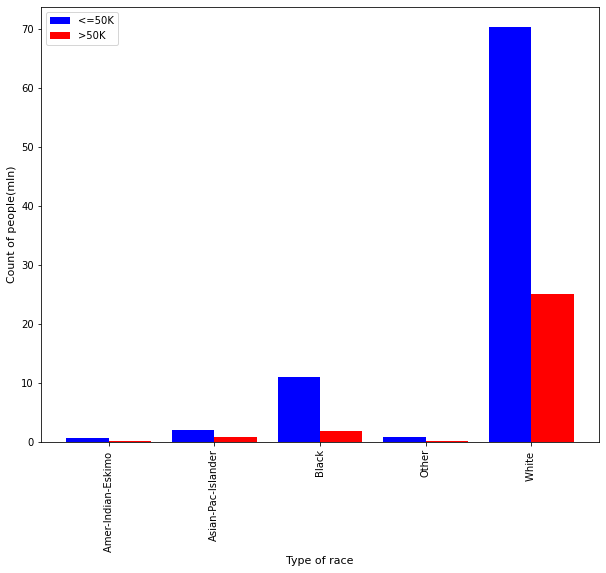

In [21]:
hist_race = income.groupby(["income","race"]).sum()
hist_race = hist_race["data_weight"]
plt.figure(figsize=(10,8))
labels = ['Amer-Indian-Eskimo ','Asian-Pac-Islander','Black','Other','White ']
plt.bar( np.arange(1, hist_race["<=50K"].index.size+1, step=1)-0.2 , hist_race.loc[("<=50K")]/51000000, width=0.4, color="blue", label="<=50K")
plt.bar( np.arange(1, hist_race[">50K"].index.size+1, step=1)+0.2 , hist_race.loc[(">50K")]/51000000, width=0.4, color="red", label=">50K")
plt.legend()
plt.xticks(np.arange(1, hist_race["<=50K"].index.size+1, step=1),labels, rotation=90)
plt.ylabel("Count of people(mln)", fontsize=11)
plt.xlabel("Type of race", fontsize=11)
plt.show()

In [34]:
#Conclusion:
# The largest number of people earning over 50K are white.
# Very few black and asian people earned over 50K.
# There is a significant disproportion in earnings between the white race and the rest of the world's races.

#Wnioski:
# Największa ilość osób zarabiających powyżej 50K to osoby o rasie białej. 
# Bardzo mało osób o rasie czarnej i azjatyckiej zarabiało powyżej 50K.
# Jest spora dysproporcja w zarobkach pomiędzy rasą białą, a resztą ras na świecie.

In [33]:
# An attempt to answer the question - Does the marital status/relationship a person is in affect the amount of his or her salary above and below 50K?
# Próba odpowiedzenia na pytanie - Czy stan małżeński/relacja w jakiej jest osoba wpływa na wysokość jej zarobków powyżej i poniżej 50K?


In [22]:
income["relation"].describe()

count       30162
unique          6
top       Husband
freq        12463
Name: relation, dtype: object

In [23]:
income["relation"].value_counts()

relation
Husband           12463
Not-in-family      7726
Own-child          4466
Unmarried          3212
Wife               1406
Other-relative      889
Name: count, dtype: int64

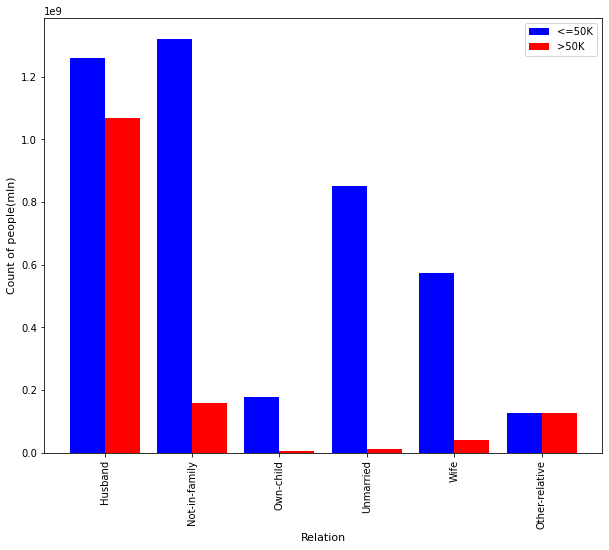

In [24]:
hist_relation= income.groupby(["income","relation"]).sum()
hist_relation =  hist_relation["data_weight"]
plt.figure(figsize=(10,8))
labels = ['Husband','Not-in-family','Own-child','Unmarried','Wife','Other-relative']
plt.bar( np.arange(1, hist_relation["<=50K"].index.size+1, step=1)-0.2 , hist_relation.loc[("<=50K")], width=0.4, color="blue", label="<=50K")
plt.bar( np.arange(1, hist_relation[">50K"].index.size+1, step=1)+0.2 , hist_relation.loc[(">50K")], width=0.4, color="red", label=">50K")
plt.legend()
plt.xticks(np.arange(1, hist_relation["<=50K"].index.size+1, step=1),labels, rotation=90)
plt.ylabel("Count of people(mln)", fontsize=11)
plt.xlabel("Relation", fontsize=11)
plt.show()

In [ ]:
#Conclusion:
# Married men were more likely to earn over 50K than married women. You can see the disproportion here, just like in the chart with gender and earnings.
# Most people without families earned less than 50K.

#Wnioski:
# Mężczyźni będący w związkach małżenskich częściej zarabiały powyżej 50K niż kobiety będace w związkach małżeńskich. Widać tutaj tą dysproporcję tak jak na wykresie z płcią i zarobkami.
# Większość osób nie posiadających rodziny zarabiało poniżej 50K.

In [159]:
# Analiza typu zatrudnienia, a zarobków powyżej i poniżej 50K. Jak rodzaj zatrudnienia wpływa na wysokość zarobków?
# Analysis type of employment and salary. How type of employment influence on salary?

In [26]:
income["employment"].value_counts()

employment
Private             22286
Self-emp-not-inc     2499
Local-gov            2067
State-gov            1279
Self-emp-inc         1074
Federal-gov           943
Without-pay            14
Name: count, dtype: int64

In [27]:
income["employment"].describe()

count       30162
unique          7
top       Private
freq        22286
Name: employment, dtype: object

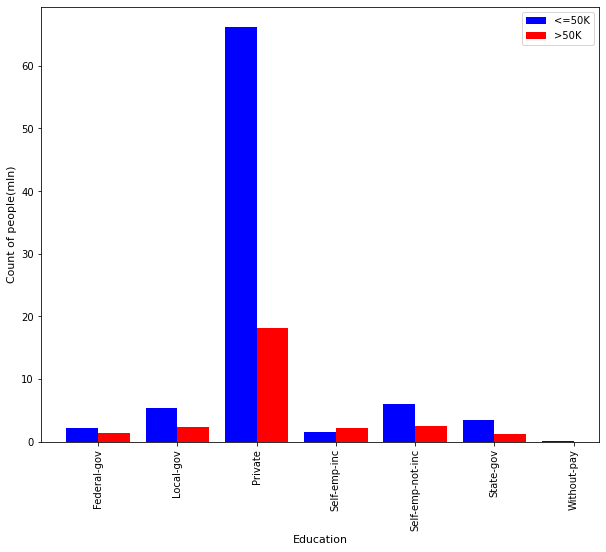

In [36]:
hist_emp= income.groupby(["income","employment"]).sum()
hist_emp =  hist_emp["data_weight"]
plt.figure(figsize=(10,8))
labels = ['Federal-gov','Local-gov','Private','Self-emp-inc','Self-emp-not-inc','State-gov','Without-pay']
plt.bar( np.arange(1, hist_emp["<=50K"].index.size+1, step=1)-0.2 , hist_emp.loc[("<=50K")]/51000000, width=0.4, color="blue", label="<=50K")
plt.bar( np.arange(1, hist_emp[">50K"].index.size+1, step=1)+0.2 , hist_emp.loc[(">50K")]/51000000, width=0.4, color="red", label=">50K")
plt.legend()
plt.xticks(np.arange(1, hist_emp["<=50K"].index.size+1, step=1),labels, rotation=90)
plt.ylabel("Count of people(mln)", fontsize=11)
plt.xlabel("Education", fontsize=11)
plt.show()

In [35]:
#Conclusion:
# Self-employed people earning over 50k outperformed self-employed people earning less than 50k.
# A large part of people employed in the private sector could count on earnings above PLN 50,000.
# In government positions, most people could count on earnings below 50k.
# This variable is related to and affects the amount of earnings.

#Wnioski:
# Osoby samozatrudnione zarabiajace powyzej 50k przewyższyły osoby samozatrudnione zarabiające poniżej 50k.
# Duża część osób zatrudnionych w prywatnym sektorze mogła liczyć na zarobki powyżej 50k.
# Na stanowiskach państwowych większość osób mogła liczyć na zarobki poniżej 50k.
# Zmienna ta jest powiązana i oddziałowywuje na wysokość zarobków. 